# Breast cancer classification using NN
## Using Breast cancer wisconsin (diagnostic) dataset

---

**Data Set Characteristics:**

* Number of Instances: 569
* Number of Attributes: 30 numeric, predictive attributes and the class
* Attribute Information:
  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry
  - fractal dimension ("coastline approximation" - 1)

For each attribute above, mean, standard error, and "worst" values are calculated. As a result, there are 30 features for each data example.
The following are two classes:
* WDBC-Malignant ($y = 1$)
* WDBC-Benign ($y = 0$)

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import sigmoid, relu
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

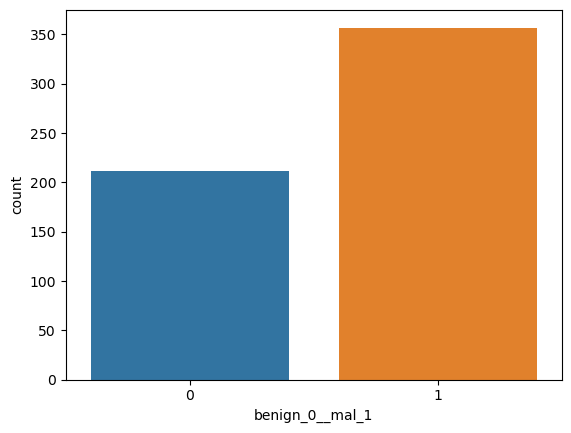

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

(31, 31)


<Axes: >

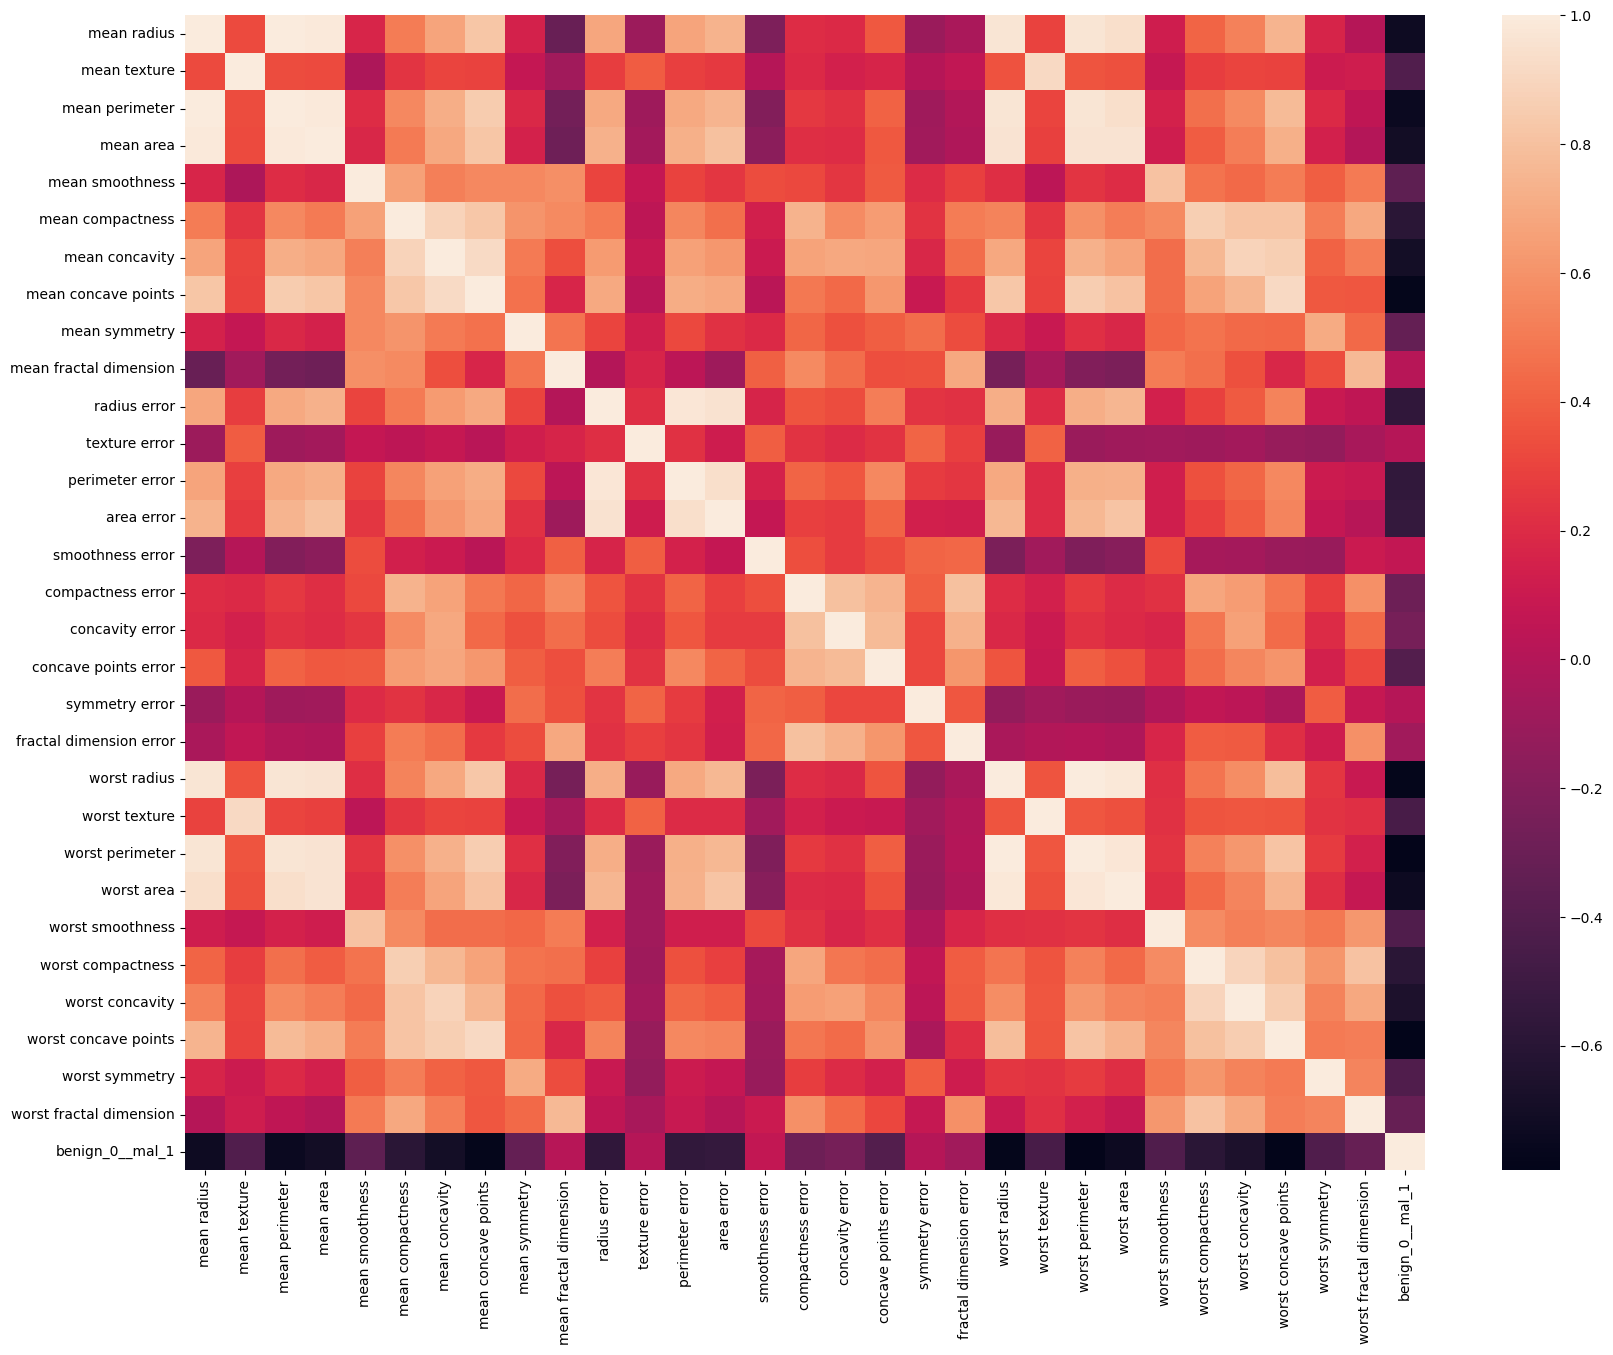

In [6]:
print(df.corr().shape)
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr())

## Train Test Split

In [7]:
# generate feature matrix X and label vector y for the whole data set
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [8]:
# train test split. test size 25%, random_state 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)
print(X_train.shape) ; print(y_train.shape)
print(X_cv.shape) ; print(y_cv.shape)
print(X_test.shape) ; print(y_test.shape)

(341, 30)
(341,)
(114, 30)
(114,)
(114, 30)
(114,)



## Scaling Data

[Using the same scaler to scale the data](https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data#:~:text=The%20test%20set%20must%20use,random%20skew%20in%20the%20data.)

In [9]:
# scale feature matrix using minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# generate scaled feature matrix for both train and test
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

## Creating the Model
[How to decide number of hidden layers and number of hidden units]( https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
)



In [10]:
# build 3 hidden layer neural network model,
# first hidden layer units = 30, activication relu;
# second hidden layer units = 15, activation relu;
# laster hidden layer units = 1, activation sigmoid
# finally compile the model using binary classfication loss function and adam optimizer as hinted above

model1 = Sequential([
    Dense(units = 30, activation = 'relu'),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid'),
])



model1.compile(loss=BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))

2023-07-22 00:40:58.009720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-22 00:40:58.009776: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Training the Model

In [11]:
# validation data is used for calculate loss after each epoch, it is not a part of training
model1.fit(X_train,
          y_train,
          epochs=600,
          validation_data=(X_cv, y_cv))

Epoch 1/600


2023-07-22 00:40:59.091188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-22 00:40:59.136103: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


11/11 [==============================] - 3s 55ms/step - loss: 0.5741 - val_loss: 0.3987
Epoch 2/600
 6/11 [===============>..............] - ETA: 0s - loss: 0.3676

2023-07-22 00:41:01.560139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 15ms/step - loss: 0.3345 - val_loss: 0.2565
Epoch 3/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2289 - val_loss: 0.2118
Epoch 4/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2139 - val_loss: 0.1423
Epoch 5/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2188 - val_loss: 0.1941
Epoch 6/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1723 - val_loss: 0.1616
Epoch 7/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1517 - val_loss: 0.1089
Epoch 8/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1218 - val_loss: 0.1152
Epoch 9/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1712 - val_loss: 0.1074
Epoch 10/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1305 - val_loss: 0.1637
Epoch 11/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1161 - val_loss: 0.0803
Epoch 12/6

11/11 [==============================] - 0s 13ms/step - loss: 0.0565 - val_loss: 0.0735
Epoch 84/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0578 - val_loss: 0.1642
Epoch 85/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0614 - val_loss: 0.0825
Epoch 86/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0602 - val_loss: 0.0551
Epoch 87/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0653 - val_loss: 0.1046
Epoch 88/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0739 - val_loss: 0.0773
Epoch 89/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0772 - val_loss: 0.0171
Epoch 90/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0684 - val_loss: 0.1170
Epoch 91/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0539 - val_loss: 0.0327
Epoch 92/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0569 - val_loss: 0.0537
Epo

11/11 [==============================] - 0s 13ms/step - loss: 0.2265 - val_loss: 0.0372
Epoch 164/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1031 - val_loss: 0.2658
Epoch 165/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1229 - val_loss: 0.0071
Epoch 166/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0678 - val_loss: 0.0675
Epoch 167/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0810 - val_loss: 0.1050
Epoch 168/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0585 - val_loss: 0.0400
Epoch 169/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0640 - val_loss: 0.0237
Epoch 170/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0740 - val_loss: 0.2370
Epoch 171/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1023 - val_loss: 0.0276
Epoch 172/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0813 - val_loss: 0

11/11 [==============================] - 0s 14ms/step - loss: 0.0964 - val_loss: 0.1089
Epoch 244/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0900 - val_loss: 0.3851
Epoch 245/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1241 - val_loss: 0.0064
Epoch 246/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0881 - val_loss: 0.0146
Epoch 247/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1086 - val_loss: 0.0503
Epoch 248/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1024 - val_loss: 0.7263
Epoch 249/600
11/11 [==============================] - 0s 14ms/step - loss: 0.4998 - val_loss: 0.1416
Epoch 250/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1691 - val_loss: 0.0969
Epoch 251/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1202 - val_loss: 0.2006
Epoch 252/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1807 - val_loss: 0

11/11 [==============================] - 0s 13ms/step - loss: 0.0978 - val_loss: 0.3315
Epoch 324/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1319 - val_loss: 0.3521
Epoch 325/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2327 - val_loss: 0.0366
Epoch 326/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1504 - val_loss: 0.4526
Epoch 327/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1973 - val_loss: 0.0790
Epoch 328/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1070 - val_loss: 0.0675
Epoch 329/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0822 - val_loss: 0.2647
Epoch 330/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1563 - val_loss: 0.0543
Epoch 331/600
11/11 [==============================] - 0s 13ms/step - loss: 0.1473 - val_loss: 0.1724
Epoch 332/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2779 - val_loss: 0

11/11 [==============================] - 0s 13ms/step - loss: 0.2130 - val_loss: 0.1963
Epoch 404/600
11/11 [==============================] - 0s 13ms/step - loss: 0.3305 - val_loss: 0.0330
Epoch 405/600
11/11 [==============================] - 0s 13ms/step - loss: 0.4420 - val_loss: 0.6188
Epoch 406/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2636 - val_loss: 0.0081
Epoch 407/600
11/11 [==============================] - 0s 13ms/step - loss: 0.3204 - val_loss: 1.1472
Epoch 408/600
11/11 [==============================] - 0s 13ms/step - loss: 0.5841 - val_loss: 0.2305
Epoch 409/600
11/11 [==============================] - 0s 13ms/step - loss: 0.3343 - val_loss: 0.0074
Epoch 410/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2078 - val_loss: 0.4064
Epoch 411/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2873 - val_loss: 0.4726
Epoch 412/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2081 - val_loss: 1

11/11 [==============================] - 0s 14ms/step - loss: 0.9271 - val_loss: 0.7957
Epoch 484/600
11/11 [==============================] - 0s 13ms/step - loss: 0.4624 - val_loss: 1.1492
Epoch 485/600
11/11 [==============================] - 0s 14ms/step - loss: 0.5039 - val_loss: 0.0570
Epoch 486/600
11/11 [==============================] - 0s 13ms/step - loss: 0.3666 - val_loss: 0.8111
Epoch 487/600
11/11 [==============================] - 0s 13ms/step - loss: 0.3857 - val_loss: 0.6928
Epoch 488/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2905 - val_loss: 0.1222
Epoch 489/600
11/11 [==============================] - 0s 13ms/step - loss: 0.4044 - val_loss: 0.1568
Epoch 490/600
11/11 [==============================] - 0s 13ms/step - loss: 0.4335 - val_loss: 0.9624
Epoch 491/600
11/11 [==============================] - 0s 14ms/step - loss: 0.3559 - val_loss: 0.0157
Epoch 492/600
11/11 [==============================] - 0s 14ms/step - loss: 1.0619 - val_loss: 0

11/11 [==============================] - 0s 14ms/step - loss: 0.3147 - val_loss: 0.4265
Epoch 564/600
11/11 [==============================] - 0s 14ms/step - loss: 0.3690 - val_loss: 0.1185
Epoch 565/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2554 - val_loss: 0.0986
Epoch 566/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2664 - val_loss: 1.2473
Epoch 567/600
11/11 [==============================] - 0s 13ms/step - loss: 0.4669 - val_loss: 0.0080
Epoch 568/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2889 - val_loss: 9.1211e-05
Epoch 569/600
11/11 [==============================] - 0s 14ms/step - loss: 0.3571 - val_loss: 0.2706
Epoch 570/600
11/11 [==============================] - 0s 14ms/step - loss: 0.6154 - val_loss: 1.7405
Epoch 571/600
11/11 [==============================] - 0s 14ms/step - loss: 0.6458 - val_loss: 0.0264
Epoch 572/600
11/11 [==============================] - 0s 14ms/step - loss: 0.9260 - val_los

<Axes: >

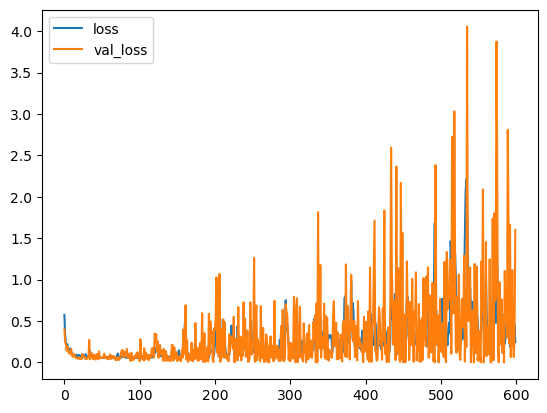

In [12]:
model_loss = pd.DataFrame(model1.history.history)
model_loss.plot()

From the above graph, overfitting happened. Calculate accuracy below.

In [13]:
import random
def getAccuracy(X, y, model):
    m = X.shape[0]
    correct = 0
    yhat = model.predict(X)
    for i in range(m):
        if (yhat[i] > 0.5):
            yhat[i] = 1
        elif (yhat[i] < 0.5):
            yhat[i] = 0
        else:
            yhat[i] = random.choice([0, 1])

    for i in range(m):
        if (yhat[i] == y[i]):
            correct += 1

    return correct / m


print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model1) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model1) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model1) * 100} %")

11/11 [==============================] - 0s 3ms/step
Accuracy on training set: 97.0674486803519 %
4/4 [==============================] - 0s 4ms/step
Accuracy on CV set: 92.98245614035088 %
1/4 [======>.......................] - ETA: 0s

2023-07-22 00:42:30.979722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 2ms/step
Accuracy on test set: 97.36842105263158 %


## Reduce the number of epochs

Epoch 1/150


2023-07-22 00:42:31.507078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-22 00:42:31.544939: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


11/11 [==============================] - 1s 36ms/step - loss: 0.6138 - val_loss: 0.4473
Epoch 2/150
 6/11 [===============>..............] - ETA: 0s - loss: 0.4028

2023-07-22 00:42:31.957250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 15ms/step - loss: 0.3694 - val_loss: 0.2667
Epoch 3/150
11/11 [==============================] - 0s 14ms/step - loss: 0.2486 - val_loss: 0.2179
Epoch 4/150
11/11 [==============================] - 0s 14ms/step - loss: 0.2348 - val_loss: 0.3040
Epoch 5/150
11/11 [==============================] - 0s 14ms/step - loss: 0.2007 - val_loss: 0.1433
Epoch 6/150
11/11 [==============================] - 0s 14ms/step - loss: 0.1694 - val_loss: 0.1218
Epoch 7/150
11/11 [==============================] - 0s 15ms/step - loss: 0.1404 - val_loss: 0.1108
Epoch 8/150
11/11 [==============================] - 0s 14ms/step - loss: 0.1218 - val_loss: 0.1140
Epoch 9/150
11/11 [==============================] - 0s 14ms/step - loss: 0.1220 - val_loss: 0.1043
Epoch 10/150
11/11 [==============================] - 0s 14ms/step - loss: 0.1006 - val_loss: 0.0825
Epoch 11/150
11/11 [==============================] - 0s 14ms/step - loss: 0.1069 - val_loss: 0.0746
Epoch 12/1

11/11 [==============================] - 0s 15ms/step - loss: 0.0597 - val_loss: 0.0817
Epoch 84/150
11/11 [==============================] - 0s 15ms/step - loss: 0.0591 - val_loss: 0.0916
Epoch 85/150
11/11 [==============================] - 0s 14ms/step - loss: 0.0606 - val_loss: 0.0216
Epoch 86/150
11/11 [==============================] - 0s 15ms/step - loss: 0.1037 - val_loss: 0.1486
Epoch 87/150
11/11 [==============================] - 0s 15ms/step - loss: 0.0952 - val_loss: 0.0270
Epoch 88/150
11/11 [==============================] - 0s 14ms/step - loss: 0.0671 - val_loss: 0.1009
Epoch 89/150
11/11 [==============================] - 0s 13ms/step - loss: 0.0555 - val_loss: 0.0799
Epoch 90/150
11/11 [==============================] - 0s 14ms/step - loss: 0.0557 - val_loss: 0.0551
Epoch 91/150
11/11 [==============================] - 0s 13ms/step - loss: 0.0658 - val_loss: 0.0254
Epoch 92/150
11/11 [==============================] - 0s 13ms/step - loss: 0.0660 - val_loss: 0.1158
Epo

2023-07-22 00:42:54.717463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Accuracy on test set: 98.24561403508771 %


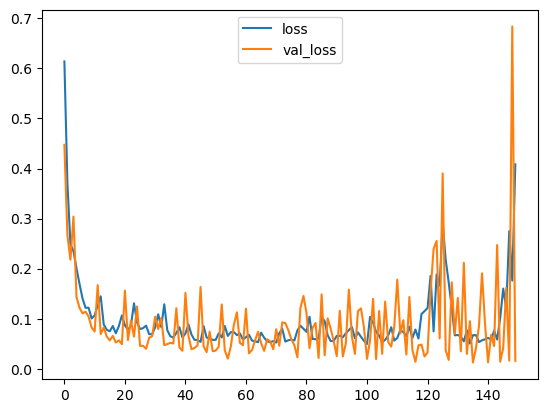

In [14]:
model2 = Sequential([
    Dense(units = 30, activation = 'relu'),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid'),
])



model2.compile(loss=BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model2.fit(X_train,
          y_train,
          epochs=150,
          validation_data=(X_cv, y_cv))

model_loss = pd.DataFrame(model2.history.history)
model_loss.plot()
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model2) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model2) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model2) * 100} %")

## Using Early Stopping (instead of eyeballing the number of epochs)


In [15]:
model3 = Sequential([
    Dense(units = 30, activation = 'relu'),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid'),
])



model3.compile(loss=BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))


Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [17]:
model3.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_cv, y_cv), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600


2023-07-22 00:42:55.273326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-22 00:42:55.311084: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


11/11 [==============================] - 1s 44ms/step - loss: 0.7028 - val_loss: 0.5703
Epoch 2/600
 6/11 [===============>..............] - ETA: 0s - loss: 0.5396

2023-07-22 00:42:55.804904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 15ms/step - loss: 0.4937 - val_loss: 0.3749
Epoch 3/600
11/11 [==============================] - 0s 14ms/step - loss: 0.3135 - val_loss: 0.2457
Epoch 4/600
11/11 [==============================] - 0s 14ms/step - loss: 0.2258 - val_loss: 0.1844
Epoch 5/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1804 - val_loss: 0.1691
Epoch 6/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1746 - val_loss: 0.2068
Epoch 7/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1683 - val_loss: 0.1141
Epoch 8/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1339 - val_loss: 0.1034
Epoch 9/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1128 - val_loss: 0.1149
Epoch 10/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1082 - val_loss: 0.0968
Epoch 11/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1194 - val_loss: 0.1155
Epoch 12/6

11/11 [==============================] - 0s 3ms/step
Accuracy on training set: 96.7741935483871 %
4/4 [==============================] - 0s 3ms/step
Accuracy on CV set: 99.12280701754386 %
4/4 [==============================] - 0s 3ms/step


2023-07-22 00:43:07.821830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Accuracy on test set: 98.24561403508771 %


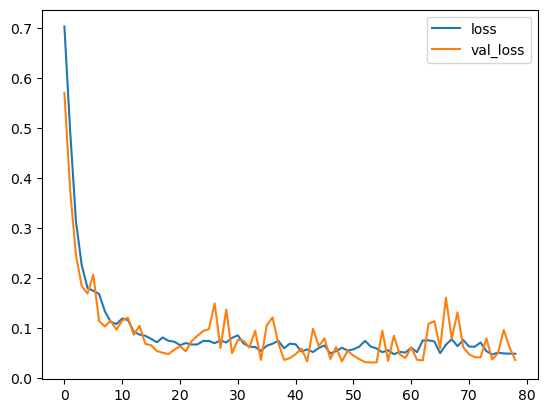

In [18]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.plot()
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model3) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model3) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model3) * 100} %")

## Adding DropOut Layers
* Dropout creates many small subnetworks. As a result, the whole network will depend less on a specific feature or a specific neuron.
* This reduces the network's reliance on particular features or co-adaptations between neurons, which can lead to overfitting.

In [19]:
model4 = Sequential([
    Dense(units = 30, activation = 'relu'),
    Dropout(0.3),
    Dense(units = 15, activation = 'relu'),
    Dropout(0.3),
    Dense(units = 1, activation = 'sigmoid'),
])



model4.compile(loss=BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))


In [20]:
# still fit the model with early stopping as shown in the previous example
model4.fit(X_train,
          y_train,
          epochs=600,
          validation_data=(X_cv, y_cv), verbose=1
          )

Epoch 1/600


2023-07-22 00:43:08.416896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-22 00:43:08.459747: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


11/11 [==============================] - 1s 41ms/step - loss: 0.6263 - val_loss: 0.4384
Epoch 2/600
 6/11 [===============>..............] - ETA: 0s - loss: 0.4624

2023-07-22 00:43:09.092151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 17ms/step - loss: 0.4640 - val_loss: 0.2799
Epoch 3/600
11/11 [==============================] - 0s 16ms/step - loss: 0.2997 - val_loss: 0.2063
Epoch 4/600
11/11 [==============================] - 0s 17ms/step - loss: 0.2256 - val_loss: 0.1646
Epoch 5/600
11/11 [==============================] - 0s 16ms/step - loss: 0.2052 - val_loss: 0.1359
Epoch 6/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1874 - val_loss: 0.1143
Epoch 7/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1508 - val_loss: 0.1100
Epoch 8/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1480 - val_loss: 0.1049
Epoch 9/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1339 - val_loss: 0.0871
Epoch 10/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1167 - val_loss: 0.1178
Epoch 11/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1194 - val_loss: 0.0748
Epoch 12/6

11/11 [==============================] - 0s 15ms/step - loss: 0.0549 - val_loss: 0.0384
Epoch 84/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0653 - val_loss: 0.0511
Epoch 85/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0642 - val_loss: 0.0379
Epoch 86/600
11/11 [==============================] - 0s 17ms/step - loss: 0.0809 - val_loss: 0.0790
Epoch 87/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0750 - val_loss: 0.0444
Epoch 88/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0808 - val_loss: 0.0619
Epoch 89/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0549 - val_loss: 0.0769
Epoch 90/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0719 - val_loss: 0.0363
Epoch 91/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0731 - val_loss: 0.0903
Epoch 92/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0965 - val_loss: 0.0562
Epo

11/11 [==============================] - 0s 15ms/step - loss: 0.0725 - val_loss: 0.0832
Epoch 164/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0694 - val_loss: 0.0443
Epoch 165/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0806 - val_loss: 0.0887
Epoch 166/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0563 - val_loss: 0.0346
Epoch 167/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0905 - val_loss: 0.0859
Epoch 168/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0874 - val_loss: 0.0463
Epoch 169/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0745 - val_loss: 0.1094
Epoch 170/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0860 - val_loss: 0.0563
Epoch 171/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0810 - val_loss: 0.0613
Epoch 172/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0888 - val_loss: 0

11/11 [==============================] - 0s 15ms/step - loss: 0.0902 - val_loss: 0.0393
Epoch 244/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0632 - val_loss: 0.1037
Epoch 245/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0837 - val_loss: 0.0418
Epoch 246/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0826 - val_loss: 0.0685
Epoch 247/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0736 - val_loss: 0.0425
Epoch 248/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0629 - val_loss: 0.0718
Epoch 249/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0759 - val_loss: 0.0494
Epoch 250/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0767 - val_loss: 0.0701
Epoch 251/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0669 - val_loss: 0.0536
Epoch 252/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0897 - val_loss: 0

11/11 [==============================] - 0s 15ms/step - loss: 0.1599 - val_loss: 0.0783
Epoch 324/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1127 - val_loss: 0.1694
Epoch 325/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1048 - val_loss: 0.0386
Epoch 326/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0877 - val_loss: 0.1036
Epoch 327/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1670 - val_loss: 0.0228
Epoch 328/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1278 - val_loss: 0.0794
Epoch 329/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1061 - val_loss: 0.0291
Epoch 330/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1257 - val_loss: 0.1398
Epoch 331/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0865 - val_loss: 0.0501
Epoch 332/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1270 - val_loss: 0

11/11 [==============================] - 0s 15ms/step - loss: 0.2349 - val_loss: 0.1311
Epoch 404/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1708 - val_loss: 0.0353
Epoch 405/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1456 - val_loss: 0.1026
Epoch 406/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1324 - val_loss: 0.0247
Epoch 407/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1536 - val_loss: 0.1475
Epoch 408/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1599 - val_loss: 0.0253
Epoch 409/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1704 - val_loss: 0.1517
Epoch 410/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1672 - val_loss: 0.4654
Epoch 411/600
11/11 [==============================] - 0s 15ms/step - loss: 0.2687 - val_loss: 0.0199
Epoch 412/600
11/11 [==============================] - 0s 15ms/step - loss: 0.2253 - val_loss: 0

11/11 [==============================] - 0s 16ms/step - loss: 0.1382 - val_loss: 0.1602
Epoch 484/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1453 - val_loss: 0.0423
Epoch 485/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1935 - val_loss: 0.1688
Epoch 486/600
11/11 [==============================] - 0s 15ms/step - loss: 0.3485 - val_loss: 0.2036
Epoch 487/600
11/11 [==============================] - 0s 16ms/step - loss: 0.3395 - val_loss: 0.0832
Epoch 488/600
11/11 [==============================] - 0s 16ms/step - loss: 0.2292 - val_loss: 0.2657
Epoch 489/600
11/11 [==============================] - 0s 15ms/step - loss: 0.3037 - val_loss: 0.0803
Epoch 490/600
11/11 [==============================] - 0s 16ms/step - loss: 0.2949 - val_loss: 0.1072
Epoch 491/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1502 - val_loss: 0.2468
Epoch 492/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1735 - val_loss: 0

11/11 [==============================] - 0s 16ms/step - loss: 0.2611 - val_loss: 0.0869
Epoch 564/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1555 - val_loss: 0.1714
Epoch 565/600
11/11 [==============================] - 0s 16ms/step - loss: 0.3437 - val_loss: 0.0591
Epoch 566/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1766 - val_loss: 0.6861
Epoch 567/600
11/11 [==============================] - 0s 15ms/step - loss: 0.4979 - val_loss: 0.0569
Epoch 568/600
11/11 [==============================] - 0s 15ms/step - loss: 0.3784 - val_loss: 0.0374
Epoch 569/600
11/11 [==============================] - 0s 15ms/step - loss: 0.4043 - val_loss: 0.2996
Epoch 570/600
11/11 [==============================] - 0s 15ms/step - loss: 0.2138 - val_loss: 0.1620
Epoch 571/600
11/11 [==============================] - 0s 16ms/step - loss: 0.3597 - val_loss: 0.1246
Epoch 572/600
11/11 [==============================] - 0s 16ms/step - loss: 0.2926 - val_loss: 0

11/11 [==============================] - 0s 3ms/step
Accuracy on training set: 97.36070381231671 %
4/4 [==============================] - 0s 4ms/step
Accuracy on CV set: 96.49122807017544 %
4/4 [==============================] - 0s 3ms/step


2023-07-22 00:44:50.040598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Accuracy on test set: 95.6140350877193 %


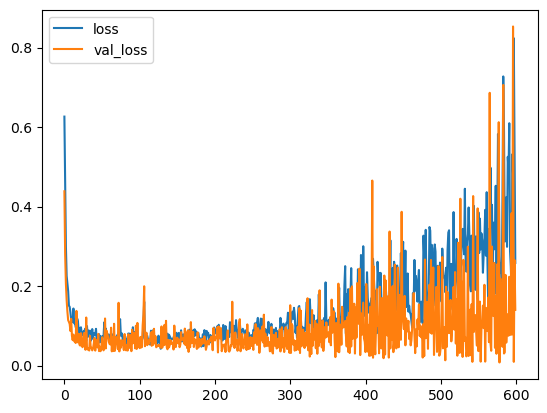

In [21]:
model_loss = pd.DataFrame(model4.history.history)
model_loss.plot()
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model4) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model4) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model4) * 100} %")

## Model Evaluation

In [22]:
print("Using Original Model")
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model1) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model1) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model1) * 100} %")

print()

print("Reduce Epochs by Estimation")
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model2) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model2) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model2) * 100} %")

print()

print("Using Early Step")
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model3) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model3) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model3) * 100} %")

print()

print("Using Dropout")
print(f"Accuracy on training set: {getAccuracy(X_train, y_train, model4) * 100} %")
print(f"Accuracy on CV set: {getAccuracy(X_cv, y_cv, model4) * 100} %")
print(f"Accuracy on test set: {getAccuracy(X_test, y_test, model4) * 100} %")

Using Original Model
11/11 [==============================] - 0s 3ms/step
Accuracy on training set: 97.0674486803519 %
4/4 [==============================] - 0s 3ms/step
Accuracy on CV set: 92.98245614035088 %
4/4 [==============================] - 0s 2ms/step
Accuracy on test set: 97.36842105263158 %

Reduce Epochs by Estimation
11/11 [==============================] - 0s 3ms/step
Accuracy on training set: 96.7741935483871 %
4/4 [==============================] - 0s 2ms/step
Accuracy on CV set: 98.24561403508771 %
4/4 [==============================] - 0s 2ms/step
Accuracy on test set: 98.24561403508771 %

Using Early Step
11/11 [==============================] - 0s 3ms/step
Accuracy on training set: 96.7741935483871 %
4/4 [==============================] - 0s 3ms/step
Accuracy on CV set: 99.12280701754386 %
4/4 [==============================] - 0s 2ms/step
Accuracy on test set: 98.24561403508771 %

Using Dropout
11/11 [==============================] - 0s 3ms/step
Accuracy on traini